In [0]:
!pip install -q kaggle


In [0]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d umairnsr87/predict-the-number-of-upvotes-a-post-will-get -p /content/

 71% 5.00M/7.08M [00:00<00:00, 15.2MB/s]
100% 7.08M/7.08M [00:00<00:00, 20.3MB/s]


In [0]:

#unzip training data for usage, will take about 5 minutes (its big)
!ls
!unzip predict-the-number-of-upvotes-a-post-will-get.zip
!ls

predict-the-number-of-upvotes-a-post-will-get.zip  sample_data
Archive:  predict-the-number-of-upvotes-a-post-will-get.zip
  inflating: test_8i3B3FC.csv        
  inflating: train_NIR5Yl1.csv       
predict-the-number-of-upvotes-a-post-will-get.zip  test_8i3B3FC.csv
sample_data					   train_NIR5Yl1.csv


In [0]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('/content/train_NIR5Yl1.csv')

FileNotFoundError: ignored

In [0]:
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
dataset.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [0]:
dataset.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [0]:
dataset.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [0]:
dataset.drop(['ID','Username'],axis=1, inplace= True)

In [0]:
dataset.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [0]:
dataset.groupby('Tag').mean()

,Reputation,Answers,Views,Upvotes
Tag,,,,
a,6065.168102,4.259189,31800.916327,316.460136
c,10566.420657,4.047697,26746.676875,327.569916
h,6985.072116,3.778837,33948.958812,384.719704
i,5238.884290,3.679753,15806.680093,117.386636
j,8285.527730,4.347256,43291.211236,540.364686
o,5656.755603,3.380654,13504.645538,112.157294
p,8062.053033,3.977077,33184.984334,407.351971
r,5290.282109,2.304292,12033.055940,79.027246
s,6545.661622,3.600866,25807.082965,237.031385


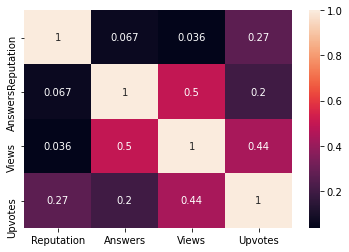

In [0]:
#correlation between each column
import seaborn as sns
plt.figure(figsize=(6,4))
cmap = dataset.corr()
sns.heatmap(cmap, annot= True)

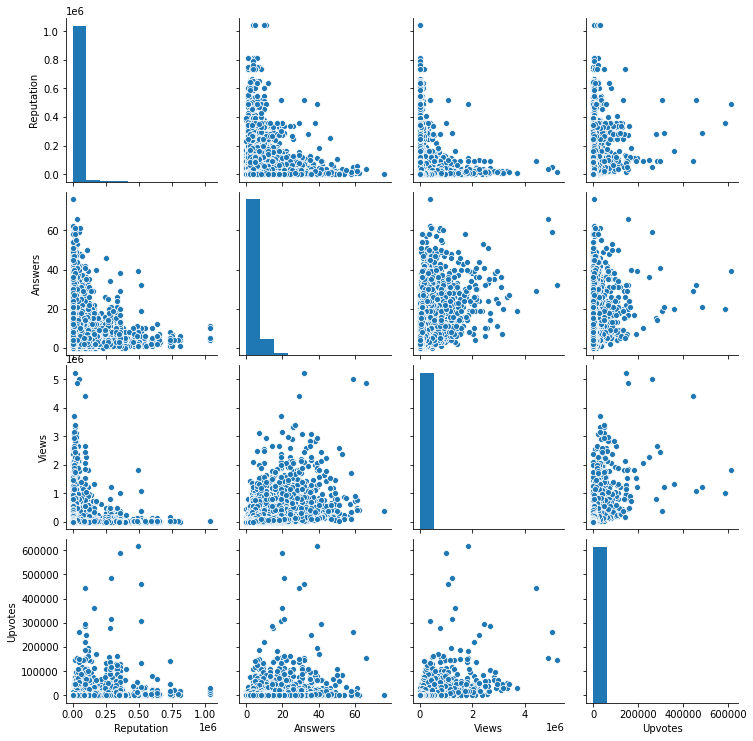

In [0]:
sns.pairplot(dataset)

In [0]:
dataset['Answers'].describe()

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64

In [0]:
len(dataset[dataset['Answers'] >10)


15434

In [0]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold = 4)
watched = bn.transform([dataset['Answers']])[0]
dataset['watched'] = watched

In [0]:
dataset.head()

,Tag,Reputation,Answers,Views,Upvotes,watched
0,a,3942.0,2.0,7855.0,42.0,0.0
1,a,26046.0,12.0,55801.0,1175.0,1.0
2,c,1358.0,4.0,8067.0,60.0,0.0
3,a,264.0,3.0,27064.0,9.0,0.0
4,c,4271.0,4.0,13986.0,83.0,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
dataset['Tag'] = lEncoder.fit_transform(dataset['Tag'])


In [0]:
dataset['Tag'].value_counts()

1    72458
4    72232
6    43407
3    32400
0    31695
8    23323
2    20564
5    14546
7    12442
9     6978
Name: Tag, dtype: int64

In [0]:
dummies = pd.get_dummies(dataset['Tag'])

In [0]:
dummies.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [0]:
dataset = pd.concat([dummies.drop(9, axis='columns'),dataset], axis ='columns')

In [0]:
dataset.head()

,0,1,2,3,4,5,6,7,8,Tag,Reputation,Answers,Views,Upvotes,watched,0,1,2,3,4,5,6,7,8
0,1,0,0,0,0,0,0,0,0,0,3942.0,2.0,7855.0,42.0,0.0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,26046.0,12.0,55801.0,1175.0,1.0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,1358.0,4.0,8067.0,60.0,0.0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,264.0,3.0,27064.0,9.0,0.0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,4271.0,4.0,13986.0,83.0,0.0,0,1,0,0,0,0,0,0,0


In [0]:
dataset.drop([0,1,2,3,4,5,6,7,8],axis =1,inplace=True)

In [0]:
dataset.head()

,Tag,Reputation,Answers,Views,Upvotes,watched
0,0,3942.0,2.0,7855.0,42.0,0.0
1,0,26046.0,12.0,55801.0,1175.0,1.0
2,1,1358.0,4.0,8067.0,60.0,0.0
3,0,264.0,3.0,27064.0,9.0,0.0
4,1,4271.0,4.0,13986.0,83.0,0.0


In [0]:
df = pd.concat([dummies.drop(9, axis='columns'),dataset], axis ='columns')

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,Tag,Reputation,Answers,Views,Upvotes,watched
0,1,0,0,0,0,0,0,0,0,0,3942.0,2.0,7855.0,42.0,0.0
1,1,0,0,0,0,0,0,0,0,0,26046.0,12.0,55801.0,1175.0,1.0
2,0,1,0,0,0,0,0,0,0,1,1358.0,4.0,8067.0,60.0,0.0
3,1,0,0,0,0,0,0,0,0,0,264.0,3.0,27064.0,9.0,0.0
4,0,1,0,0,0,0,0,0,0,1,4271.0,4.0,13986.0,83.0,0.0


In [0]:
df.drop('Tag',axis = 1, inplace = True)

In [0]:
column_list = [x for x in df.columns if x not in ['Upvotes']]
X = df[column_list].values
y = df['Upvotes'].values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3942.0,2.0,7855.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26046.0,12.0,55801.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1358.0,4.0,8067.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,3.0,27064.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4271.0,4.0,13986.0,0.0


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df[column_list], y ,test_size = 0.25,random_state =0)



In [0]:
from sklearn.linear_model import LinearRegression
regresser = LinearRegression()
regresser.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regresser.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3239193796348905

In [0]:
plt.scatter(df['Tag'],df['Upvotes'])
plt.plot(df['Tag'],df[''])